# Лабораторная забота №1. 

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as spc
from scipy.stats import norm, describe
import scipy.stats as sts
from scipy import stats
from scipy.stats import logistic, skew, kurtosis, describe


In [4]:
a = 2
sigma = 5
n = 190
q = 1.9

# 1.	Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,b^2).

In [5]:
data = np.random.normal(a, sigma, n)
data

array([ -7.86438194,   0.26086127, -14.74587687,   4.41869896,
         3.03820399,  -7.50210556,   2.92713024,   4.71901111,
         0.50157011,   3.94602017,  -1.5501627 ,  -0.96001999,
        -0.16006137,  -3.06111445,  -5.16446041,   8.9947367 ,
         7.85027431,   5.23459901,  -4.69566816,   3.11665522,
        -5.72077425,  10.342174  ,   4.1016279 ,  -1.85840062,
        -0.74144893,   9.4986519 ,   2.48040384,  -3.4390162 ,
         2.48158531,   7.7676211 ,   3.45533466,   3.78308884,
        -0.61114051,   6.05247761,  -6.28150177,   2.4699738 ,
         6.71971499,  -1.25560688,  -2.71418261,  -1.26070128,
         4.16501545,   9.31723299,  -5.01473551,   3.30928243,
         6.80587752,  -0.06269118,   3.61725594,  -2.33829695,
         7.78213032,   0.75398449,   0.05038716,  -4.41775839,
        -5.39268125,   7.13225641,  -2.50518112,  -6.91160342,
         2.10252941,  -7.43782543,   5.79756173,   1.26616267,
        -0.64788918,  -2.58150807,  -1.41993401,   4.91

## 1.1. Интервальная группировка по правилу Скотта


In [6]:
bin_width = int(3.49 * np.std(data) * (n ** (-1/3)))  # правило Скотта
num_bins = int(np.ceil((max(data) - min(data)) / bin_width))
abs_freq, bin_edges = np.histogram(data, bins=num_bins)
print(bin_edges)

[-14.74587687 -11.86406388  -8.98225088  -6.10043788  -3.21862488
  -0.33681188   2.54500111   5.42681411   8.30862711  11.19044011
  14.0722531   16.9540661 ]


### Сумма абсолютных частот


In [7]:
sum_abs_freq = np.sum(abs_freq)
sum_abs_freq

np.int64(190)

### Диаграмма абсолютных частот


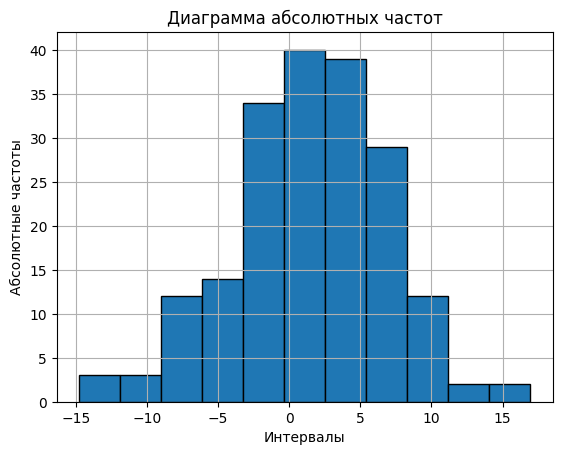

In [8]:
plt.bar(bin_edges[:-1], abs_freq, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title('Диаграмма абсолютных частот')
plt.xlabel('Интервалы')
plt.ylabel('Абсолютные частоты')
plt.grid(True)
plt.show()

## 1.2. Интервальный ряд относительных частот


In [9]:
rel_freq = abs_freq / n
sum_rel_freq = np.sum(rel_freq)
print(sum_rel_freq)
print(rel_freq)

1.0
[0.01578947 0.01578947 0.06315789 0.07368421 0.17894737 0.21052632
 0.20526316 0.15263158 0.06315789 0.01052632 0.01052632]


### Диаграмма относительных частот


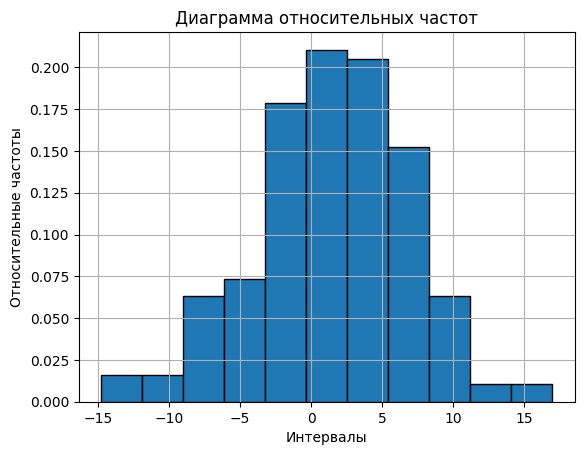

In [10]:
plt.bar(bin_edges[:-1], rel_freq, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title('Диаграмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.grid(True)
plt.show()

In [11]:
print(f"Сумма абсолютных частот: {sum_abs_freq}")
print(f"Сумма относительных частот: {sum_rel_freq}")

Сумма абсолютных частот: 190
Сумма относительных частот: 1.0


# 2.1 Гистограмма относительных частот и теоретическая кривая распределения


In [12]:
x = np.linspace(np.min(data), np.max(data), 1000)
pdf = norm.pdf(x, a, sigma)     #probability density function/функция плотности вероятности

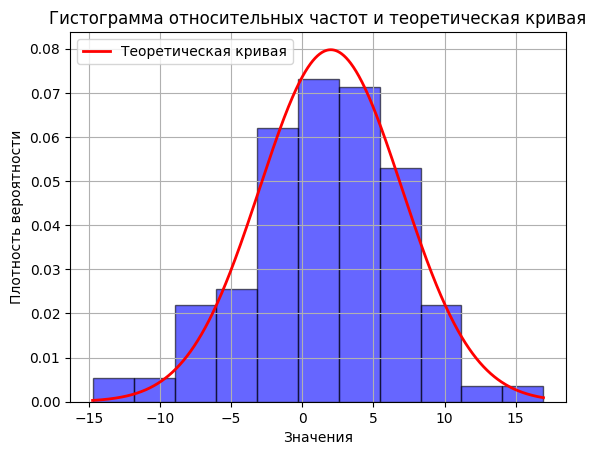

In [13]:
plt.hist(data, bins=bin_edges, density=True, alpha=0.6, color='b', edgecolor='black')
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая кривая')
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

# 2.2 Гистограмма абсолютных частот и график теоретической частоты


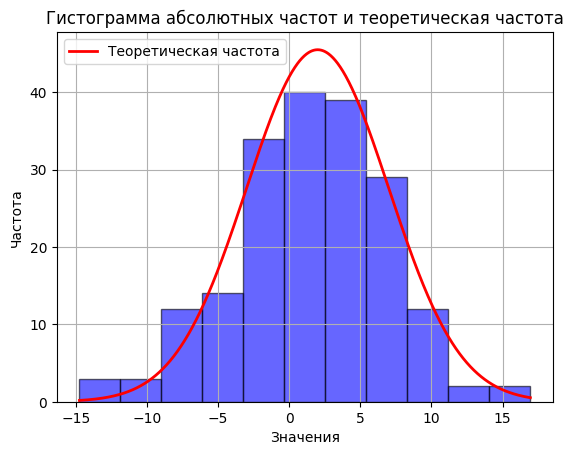

In [14]:
plt.hist(data, bins=num_bins, alpha=0.6, color='b', edgecolor='black')
plt.plot(x, pdf * n * bin_width, 'r-', lw=2, label='Теоретическая частота')
plt.title('Гистограмма абсолютных частот и теоретическая частота')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# 2.3 Эмпирическая функция распределения


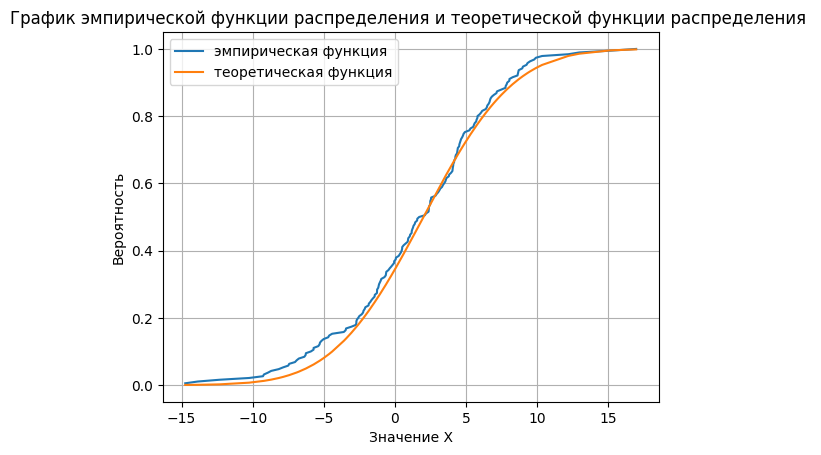

In [15]:
data=np.sort(data)
F_empirical = np.arange(1, n + 1) / n
F_theoretical = 0.5 * (1 + spc.erf((data - a) / (sigma * np.sqrt(2))))
plt.plot(data, F_empirical, label='эмпирическая функция', linestyle='-')
plt.plot(data, F_theoretical, label='теоретическая функция', linestyle='-')
plt.xlabel('Значение X')
plt.ylabel('Вероятность')
plt.title('График эмпирической функции распределения и теоретической функции распределения ')
plt.legend()
plt.grid(True)
plt.show()

# 2.4 Построение бокс-плота


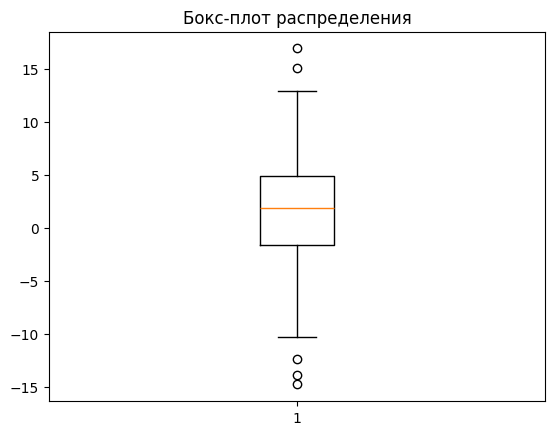

In [16]:
plt.boxplot(data, vert=True)
plt.title("Бокс-плот распределения")
plt.show()

### Статистическая интерпретация

In [17]:
Q1 = np.percentile(data, 25)  
Q2 = np.percentile(data, 50)  
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = len(outliers)
print('Количество выбросов:',num_outliers)
expected_outliers_1_percent = n * 0.01
expected_outliers_5_percent = n * 0.05

print(f'теоретически ожидаемое число выбросов : ({expected_outliers_1_percent:.2f}, {expected_outliers_5_percent:.2f})')

Количество выбросов: 5
теоретически ожидаемое число выбросов : (1.90, 9.50)


# Проанализировав результаты п.1 и 2., ответить на следующие вопросы:

### A)	Какова Ваша оценка вероятности попадания значений случайной  величины X в k-ый интервал полученной группировки?

In [18]:
k=6
print(f"[{bin_edges[k]}, {bin_edges[k + 1]}) \n\
      абсолютные частоты: {abs_freq[k]}" f" \n\
      относительные частоты: {rel_freq[k]}")

[2.5450011130199925, 5.426814110830275) 
      абсолютные частоты: 39 
      относительные частоты: 0.20526315789473684


### B) Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике.

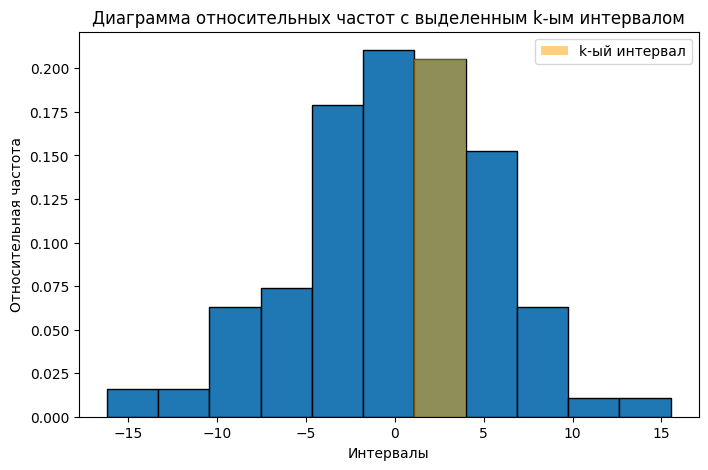

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], rel_freq, width=np.diff(bin_edges), edgecolor='black')
plt.bar(bin_edges[k], rel_freq[k], width=np.diff(bin_edges)[k], color='orange', alpha=0.5, label='k-ый интервал')
plt.title('Диаграмма относительных частот с выделенным k-ым интервалом')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.legend()
plt.show()


### C)	Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений случайной  величины X в k-ый интервал, покажите ее на графике.

- график 2.1

### D) Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?

In [20]:
b_k = bin_edges[k + 1] 
F_b_k = stats.norm.cdf(b_k, loc=a, scale=sigma)
print(f'Оценка интегральной функции распределения в правой границе {k}-ого интервала: {F_b_k}')

Оценка интегральной функции распределения в правой границе 6-ого интервала: 0.7534425008960464


## 3.1 Функция Лапласа для P(|X - MX| < qσ)

Используя таблицу значений функции Лапласа

По таблице Лапласа нашел значение q=1,9 : 0,4713
P(|X - MX| < qσ)= 2*0,4713=0,9426

In [21]:
P_theoretical = norm.cdf(a + q * sigma, a, sigma) - norm.cdf(a - q * sigma, a, sigma)
print(f'Вероятность P(|X - {a}| < {q} * {sigma}) = {P_theoretical:.4f}')

Вероятность P(|X - 2| < 1.9 * 5) = 0.9426


## 3.2 Оценка вероятности по выборке

In [22]:
P_empirical = np.mean(np.abs(data - a) < q * sigma)

In [23]:
print(f"Теоретическая вероятность: {P_theoretical}")
print(f"Оценка вероятности по выборке: {P_empirical}")

Теоретическая вероятность: 0.9425668803679963
Оценка вероятности по выборке: 0.9210526315789473


# 3.3 Увеличивать объем в 50 раз и делать так 2.2

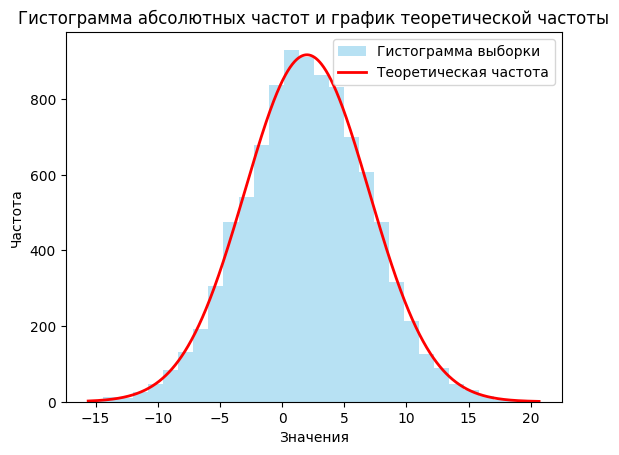

In [24]:
n_large = 190*50   
data_large = np.random.normal(loc=a, scale=sigma, size=n_large)
count, bins, _ = plt.hist(data_large, bins=30, density=False, alpha=0.6, color='skyblue', label='Гистограмма выборки')

bin_width = bins[1] - bins[0]  # Ширина одного интервала (бина)
x = np.linspace(min(data_large), max(data_large), 1000)
pdf = n_large * bin_width * norm.pdf(x, loc=a, scale=sigma)  # Масштабирование плотности на размер выборки и ширину бина

plt.plot(x, pdf, color='red', linewidth=2, label='Теоретическая частота')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма абсолютных частот и график теоретической частоты')
plt.legend()
plt.show()


In [25]:
P_theoretical = norm.cdf(q) - norm.cdf(-q)
P_empirical = np.mean(np.abs(data_large - a) < q * sigma)
print(f"Теоретическая вероятность: {P_theoretical}")
print(f"Оценка вероятности по выборке: {P_empirical}")

Теоретическая вероятность: 0.9425668803679963
Оценка вероятности по выборке: 0.9457894736842105


# 4. Точечные оценки параметров

### 4.1 первый способ – непосредственное применение формул для вычисления точечных оценок

In [26]:
def cal_mx(data, n):
    sum = 0.0
    for i in data:
        sum += i
    return sum/n

def cal_median(data):
    if n % 2 == 1:
        return data[n//2]
    else:
        mid1 = data[(n+1) // 2]
        mid2 = data[(n - 1) // 2]
        return (mid1 + mid2) / 2
    
def cal_dx(data, mean, n):
    sum = 0.0
    for i in data:
        sum += (i - mean)**2
    return sum/(n-1)

def cal_sigma (dx):
    return math.sqrt(dx)

def cal_skewness(data, mean, dx):
    sum_3 = 0
    for i in data:
        sum_3 += (i - mean)**3
    
    return (sum_3 / n) / (dx ** (3/2))

In [27]:
print("Математического ожидания :", cal_mx(data, n))
print("Медиан", cal_median(data))
print("Дисперсии", cal_dx(data, cal_mx(data, n), n))
print("Стандартного отклонения", cal_sigma(cal_dx(data, cal_mx(data, n), n)))
print("Коэффициент ассиметрии:",cal_skewness(data, cal_mx(data, n), cal_dx(data, cal_mx(data, n), n)))

Математического ожидания : 1.5235031165124415
Медиан 1.9007825416286466
Дисперсии 28.80022898046798
Стандартного отклонения 5.3665844799525875
Коэффициент ассиметрии: -0.29961386404427703


### 4.2 второй способ – применение встроенных функций Python

In [28]:
mean = np.mean(data)
median = np.median(data)
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)
skewness = sts.skew(data)

In [29]:
print(f"Оценка мат. ожидания: {mean}")
print(f"Оценка медианы: {median}")
print(f"Оценка дисперсии: {variance}")
print(f"Оценка стандартного отклонения: {std_dev}")
print("Коэффициент ассиметрии:",skewness)

Оценка мат. ожидания: 1.5235031165124406
Оценка медианы: 1.9007825416286466
Оценка дисперсии: 28.800228980467967
Оценка стандартного отклонения: 5.366584479952586
Коэффициент ассиметрии: -0.30199489444020455


## 4.3 Увеличение выборки

In [30]:
n_large = 50 * n
data_large = np.random.normal(a, sigma, n_large)
mean_large = np.mean(data_large)
median_large=np.median(data_large)
variance_large = np.var(data_large, ddof=1)  # Дисперсия
std_dev_large = np.sqrt(variance_large)  # Стандартное отклонение
skewness_large = sts.skew(data_large)   # Коэффициент асимметрии

In [31]:
print(f"Оценка мат. ожидания: {mean_large}")
print(f"Оценка медианы: {median_large}")
print(f"Оценка дисперсии: {variance_large}")
print(f"Оценка стандартного отклонения: {std_dev_large}")
print("Коэффициент ассиметрии:",skewness_large)

Оценка мат. ожидания: 1.9909236622824587
Оценка медианы: 1.9710195513206323
Оценка дисперсии: 25.219371729397338
Оценка стандартного отклонения: 5.021889258973891
Коэффициент ассиметрии: 0.017217073724273474


# Проанализировав результаты п.4, ответить на следующие вопросы:

## A)	Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? 

In [32]:
print("Коэффициент ассиметрии", sts.skew(data))
print("Коэффициенты эксцесса", sts.kurtosis(data))

Коэффициент ассиметрии -0.30199489444020455
Коэффициенты эксцесса 0.26654907151893426


## B)	 Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. 

- увеличение объема выборки способствует более точным и надежным оценкам параметров распределения
- Это явление известно как закон больших чисел

## C)	Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?

Состоятельность оценок
- Состоятельность: Оценка параметра считается состоятельной, если по мере увеличения объема выборки она стремится к истинному значению этого параметра.
- Сходимость по вероятности: Состоятельные оценки обладают свойством сходимости по вероятности, что означает.

# Часть II

### 2.1 Смоделировать выборку из п независимых наблюдений над случайной величиной Y

In [33]:
s = 1        # Параметр масштаба
mu = 3       # Параметр сдвига
n = 190      # Объем выборки (указанный в варианте)

Y = logistic.rvs(loc=mu, scale=s, size=n) #по логистическому закону
Y


array([ 2.51792759,  3.60176393,  5.29388237,  4.52091915,  5.69976078,
        1.77277169,  4.3587549 ,  8.30107464,  4.00309865,  4.41745688,
        4.51572137,  1.78467703,  0.6794672 ,  0.62655366,  1.45410019,
        3.50015968,  0.83749724,  1.37090152,  4.4415205 ,  1.56214501,
        2.69773228,  3.32919573,  2.56697079,  2.13607333,  2.1267698 ,
        2.36541434,  3.6422174 ,  2.21233361,  2.30459925,  2.10149911,
        2.45300963,  4.1266882 ,  4.88341869,  4.45549887,  2.43295277,
        4.63485767,  4.16326712,  2.35375376,  6.14673558,  2.7614387 ,
        2.24114897,  2.75988965,  4.99151143,  3.40072485,  2.35435618,
        2.30345201,  3.9495258 ,  3.15946713,  6.67273573,  2.98281891,
        2.40997078,  4.11695031,  2.6222392 ,  2.00694498,  5.02867937,
       -0.64617123, -0.03848519,  1.57538882,  3.20363875,  5.5949762 ,
        1.51826268,  0.89603335,  4.31356815,  3.38038622,  2.76924309,
        2.46586892,  1.39633231,  2.65871477,  2.4180471 ,  3.11

### 2.2 Для визуализации данных построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Y 

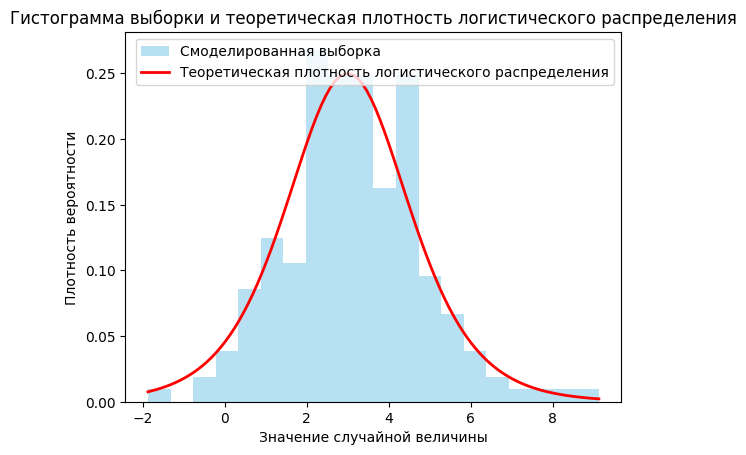

In [34]:

# Построение гистограммы для проверки распределения
plt.hist(Y, bins=20, density=True, alpha=0.6, color='skyblue', label='Смоделированная выборка')

# График теоретической плотности распределения
x = np.linspace(min(Y), max(Y), 100)
pdf = logistic.pdf(x, loc=mu, scale=s)
plt.plot(x, pdf, 'r', linewidth=2, label='Теоретическая плотность логистического распределения')

# Оформление графика
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма выборки и теоретическая плотность логистического распределения')
plt.legend()
plt.show()

### 2.3 Построить по выборке бокс-плот распределения (“ящик с усами”) случайной величины Y 

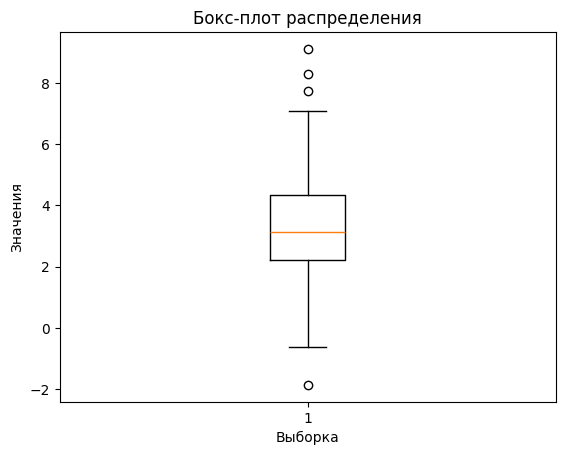

In [35]:
plt.boxplot(Y)
plt.xlabel('Выборка')
plt.ylabel('Значения')
plt.title('Бокс-плот распределения')
plt.show()

In [36]:
outliers = Y[(Y < lower_bound) | (Y > upper_bound)]
num_outliers = len(outliers)
expected_outliers = 0.05 * n  

print(f'Количество выбросов в выборке: {num_outliers}')
print(f'Теоретически ожидаемое число выбросов: {expected_outliers:.2f}')

Количество выбросов в выборке: 0
Теоретически ожидаемое число выбросов: 9.50


# 2 Используя теоретические знания о функции распределения случайной величины, найти  вероятность

## 2.1 Найти вероятность (*), используя встроенные функции Python.

In [37]:
q = 1.9 
lower_bound = mu - q * s 
upper_bound = mu + q * s  
probability = logistic.cdf(upper_bound, loc=mu, scale=s) - logistic.cdf(lower_bound, loc=mu, scale=s)
print(f'Вероятность P(|Y - mu_Y| < {q} * sigma_Y) = {probability}')

Вероятность P(|Y - mu_Y| < 1.9 * sigma_Y) = 0.7397830512740045


## 2.2 Найдите по выборке оценку вероятности 


In [38]:
condition = np.abs(Y - mu) < q * s
relative_frequency = np.mean(condition)

print(f'Оценка вероятности P(|Y - mu_Y| < {q} * sigma_Y) = {relative_frequency}')

Оценка вероятности P(|Y - mu_Y| < 1.9 * sigma_Y) = 0.7526315789473684


# 2.3 Увеличьте объем выборки п в 50 раз и повторите п. 2.2

In [39]:
Y_large = logistic.rvs(loc=mu, scale=s, size=n * 50)
prob_empirical = np.mean((Y_large > lower_bound) & (Y_large < upper_bound))
print(f"Empirical probability P(|Y - M_Y| < qσ): {prob_empirical}")

Empirical probability P(|Y - M_Y| < qσ): 0.7394736842105263


## 3 Вычислить по выборке точечные оценки параметров распределения случайной величины Y

In [40]:
mean_y = np.mean(Y)                  
median_y = np.median(Y)             
variance_y = np.var(Y, ddof=1)       
std_y = np.std(Y, ddof=1)           
skewness_y = skew(Y)                
kurtosis_y = kurtosis(Y)             

# Вывод результатов
print(f"Математическое ожидание: {mean_y}")
print(f"Медиана: {median_y}")
print(f"Дисперсия: {variance_y}")
print(f"Стандартное отклонение: {std_y}")
print(f"Коэффициент асимметрии: {skewness_y}")
print(f"Коэффициент эксцесса: {kurtosis_y}")

Математическое ожидание: 3.1759704191346145
Медиана: 3.12634559491702
Дисперсия: 2.82357192845958
Стандартное отклонение: 1.680348752033214
Коэффициент асимметрии: 0.28656975079791364
Коэффициент эксцесса: 0.7543760567686135
